# Cálculo IMC Pokemon Gen 1
## Obtención de datos

In [24]:
import requests
import pandas as pd
# Crear DataFrame
pokemon = pd.DataFrame(columns=["nombre", "peso", "altura"])
pokemon

,nombre,peso,altura


In [25]:
# Loop de recopilación de información 151 pokemon
for i in range(1, 152):
    response = requests.get(f"https://pokeapi.co/api/v2/pokemon/" + str(i))
    data = response.json()
    pokemon.loc[i] = [data["name"], data["weight"], data ["height"]]
pokemon

,nombre,peso,altura
1,bulbasaur,69,7
2,ivysaur,130,10
3,venusaur,1000,20
4,charmander,85,6
5,charmeleon,190,11
...,...,...,...
147,dratini,33,18
148,dragonair,165,40
149,dragonite,2100,22
150,mewtwo,1220,20


## Revisión, limpieza y transformación

In [15]:
# Observar primeros 5 datos del dataframe
pokemon.head(5)

,nombre,peso,altura
1,bulbasaur,69,7
2,ivysaur,130,10
3,venusaur,1000,20
4,charmander,85,6
5,charmeleon,190,11


In [26]:
# Obtener información de las columnas y el tipo de variable
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nombre  151 non-null    object
 1   peso    151 non-null    int64 
 2   altura  151 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


In [27]:
# Transformar datos a Kg y m
pokemon["peso"] = pokemon["peso"] / 10
pokemon["altura"] = pokemon["altura"] / 10
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  151 non-null    object 
 1   peso    151 non-null    float64
 2   altura  151 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [28]:
# Cálculo objetivo IMC
pokemon["IMC"] = pokemon["peso"]/(pokemon["altura"] ** 2)
pokemon

,nombre,peso,altura,IMC
1,bulbasaur,6.9,0.7,14.081633
2,ivysaur,13.0,1.0,13.000000
3,venusaur,100.0,2.0,25.000000
4,charmander,8.5,0.6,23.611111
5,charmeleon,19.0,1.1,15.702479
...,...,...,...,...
147,dratini,3.3,1.8,1.018519
148,dragonair,16.5,4.0,1.031250
149,dragonite,210.0,2.2,43.388430
150,mewtwo,122.0,2.0,30.500000


In [29]:
# Ordenar y mostrar los primeros 10
pokemon.sort_values("IMC", ascending = False).head(10)

,nombre,peso,altura,IMC
76,golem,300.0,1.4,153.061224
74,geodude,20.0,0.4,125.000000
111,rhyhorn,115.0,1.0,115.000000
56,mankey,28.0,0.5,112.000000
75,graveler,105.0,1.0,105.000000
143,snorlax,460.0,2.1,104.308390
86,seel,90.0,1.1,74.380165
133,eevee,6.5,0.3,72.222222
51,dugtrio,33.3,0.7,67.959184
81,magnemite,6.0,0.3,66.666667


## Guardar información

In [ ]:
# Exportar
pokemon.to_excel("Pokemon_IMC.xls")

## Graficar información

<Axes: xlabel='peso', ylabel='altura'>

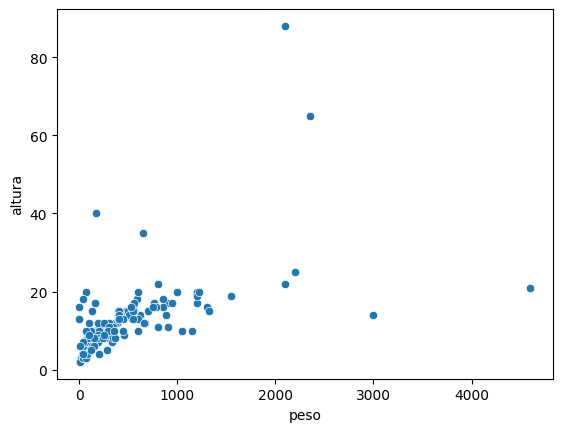

In [19]:
import seaborn
seaborn.scatterplot(x = pokemon["peso"], y = pokemon["altura"])